In [1]:
%pylab inline
import sklearn
import pandas as pd
import mylib.utils as mu
from sklearn.metrics import f1_score
from sklearn.linear_model import RidgeClassifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
run_name = 'nu_info'
data = mu.load_data(['nu_info'])

In [3]:
target = mu.load_target_data()

In [4]:
models = [RidgeClassifier(alpha=[1], class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, solver='auto', tol=0.001)]
results = mu.train_regression(data, ravel(target), seed=333, models=models)

01:52:22 10/04/15 BRT - Spliting into test and validation
01:52:22 10/04/15 BRT - Starting to train models
01:52:22 10/04/15 BRT - Took 0.00246500968933 seconds


In [5]:
mu.print_best(results)
from sklearn.metrics import confusion_matrix, classification_report

------------------------------------------------- 
0 Model - Score: val - 0.596859 :: train - 0.623025
RidgeClassifier(alpha=[1], class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, solver='auto', tol=0.001)
------------------------------------------------- 


In [6]:
print mu.classification_report_matrix(results[0][1]['y_val'], results[0][1]['pred_val'])

01:52:23 10/04/15 BRT - 
             precision    recall  f1-score   support

          0       0.58      0.84      0.68        99
          1       0.66      0.34      0.45        92

avg / total       0.62      0.60      0.57       191

[[83 16]
 [61 31]]
None


In [7]:
mu.save_predictions_from_all(results, run_name=run_name, score_threshold=.59)

01:53:06 10/04/15 BRT - Saved ./Output/pred_nu_info_596_RidgeClassifier.csv


AttributeError: 'SVC' object has no attribute 'feature_importances_'

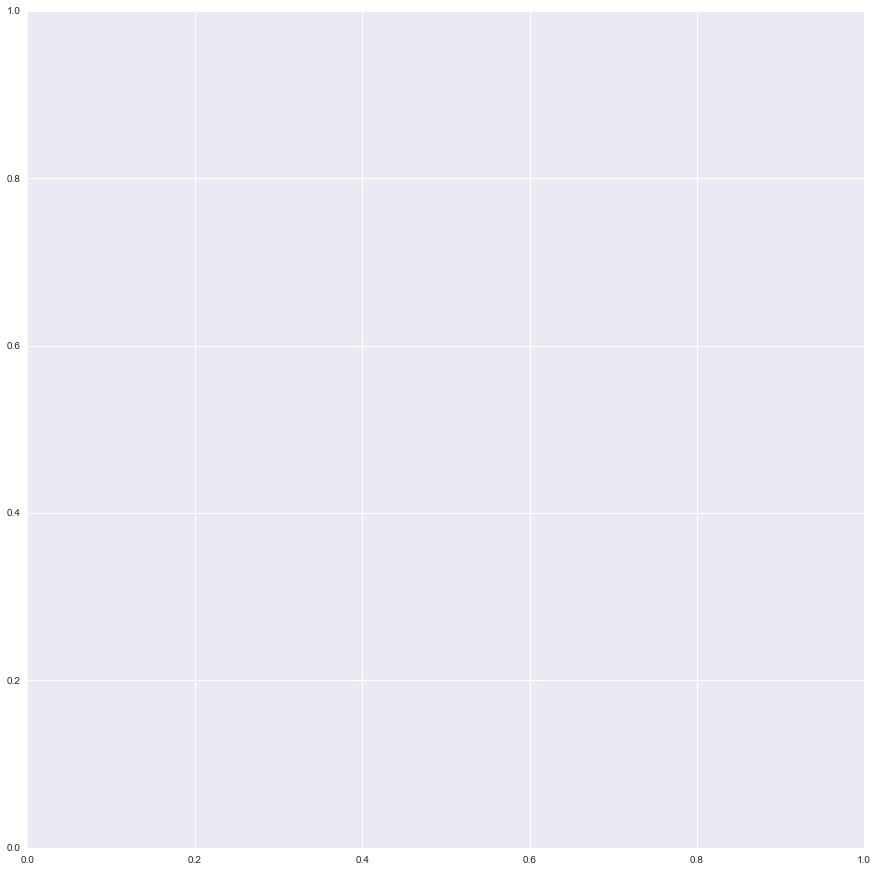

In [9]:
import seaborn as sns
model = results[0][1]['model']
# print model info
f, ax = plt.subplots(figsize=(15, 15))
index_most_important = model.feature_importances_>0.03
ax = sns.barplot(x=data.columns[index_most_important], y=model.feature_importances_[index_most_important])

In [ ]:
model = model = results[0][1

In [ ]:
pred_test = results[0][1]['pred_test']